In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import load_model
print(tf.__version__)

1.10.0


In [12]:
def plot_images(images, cls_true, cls_pred=None):
    
    fig, axes = plt.subplots(1, 5)
    fig.subplots_adjust(hspace=1, wspace=0.2)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(28,28), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "Actual: {0}".format(cls_true[i])
        else:
            xlabel = "Actual: {0},\n Prediction: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

In [2]:
model = load_model('model.keras')

In [3]:
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
#print(x_test[0])

In [5]:
#x_test = tf.keras.utils.normalize(nx_test, axis=1)
y_test = keras.utils.to_categorical(y_test, 10)
#x_test = x_test.reshape(x_test.shape[0], 28*28)

In [9]:
print (x_test.shape)
x_test = x_test[..., np.newaxis]
print (x_test.shape)

(10000, 28, 28)
(10000, 28, 28, 1)


In [10]:
result = model.evaluate(x_test, y_test)
for name, value in zip(model.metrics_names, result):
    print (name, value)

10000/10000 [==============================] - 5s 469us/step
loss 0.1546682961879049
acc 0.9902


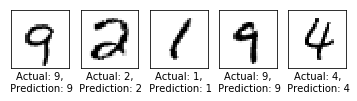

In [13]:
R_img = range (105,110)
plot_images(x_test[R_img], np.argmax(y_test[R_img],axis=1), np.argmax(model.predict(x_test[R_img]), axis=1))

In [17]:
y_prediction = np.argmax(model.predict(x_test), axis=1)
actual= np.argmax(y_test, axis=1)
len(actual)
misclassification=[i for i in range (10000) if actual[i]!=y_prediction[i]]
print(len(misclassification))
misclassification

98


[321,
 445,
 449,
 582,
 583,
 646,
 659,
 924,
 938,
 947,
 1014,
 1039,
 1114,
 1182,
 1226,
 1232,
 1260,
 1319,
 1393,
 1414,
 1459,
 1527,
 1530,
 1641,
 1678,
 1681,
 1709,
 1782,
 1901,
 2025,
 2070,
 2118,
 2130,
 2135,
 2280,
 2387,
 2406,
 2414,
 2462,
 2488,
 2597,
 2654,
 2720,
 2760,
 2896,
 2921,
 2939,
 2953,
 2995,
 3060,
 3422,
 3474,
 3503,
 3520,
 3558,
 3662,
 3727,
 3749,
 3762,
 3808,
 3985,
 4176,
 4205,
 4284,
 4369,
 4497,
 4639,
 4699,
 4740,
 4761,
 4807,
 4823,
 4956,
 5457,
 5937,
 5955,
 5997,
 6011,
 6091,
 6555,
 6597,
 6614,
 6625,
 6755,
 7216,
 7492,
 7849,
 8059,
 8094,
 9587,
 9638,
 9642,
 9664,
 9679,
 9692,
 9729,
 9770,
 9839]

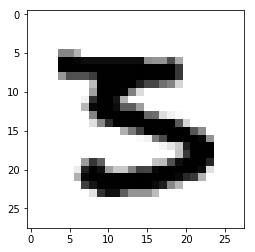

actual:  3 predication:  5


In [26]:
plt.imshow(x_test[449].reshape(28,28), cmap='binary')
plt.show()
print("actual: ",actual[449],"predication: ", y_prediction[449])